<table>
<tr>
    <td width=10%><img src="./img/logo_lri.jpg"></td>
    <td width=30%><img src="./img/medi-chal_logo.png" height=15%></img></td>
</tr>

</table>

<br/><br/><div id="top"></div>

<center><a style="font-size: 40pt; font-weight: bold">Chems Challenge</a></center>
<br/>
<center><a style="font-size: 22pt; font-weight: bold">Binary Classification and Feature Selection</a></center>
<br/>

---

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

<b><font size="5">Outline</font></b><br/><br/>
&emsp;&emsp;&emsp; I) <a href="#Data"> Data loading</a><br/>
&emsp;&emsp;&emsp; II) <a href="#Selection"> Feature selection </a><br/>
&emsp;&emsp;&emsp; III) <a href="#Baseline"> Baseline classification model </a><br/>
&emsp;&emsp;&emsp; IV) <a href="#Submission"> Submission files </a><br/>

## <a id="Data"> I) Data loading</a>  

Description

In [2]:
features = pd.read_csv('../public_data_1/chems_feat.name',header=None).values.flatten()
labels = pd.read_csv('../public_data_1/chems_label.name', header=None).values.flatten()
X = pd.read_csv('../public_data_1/chems_train.data', header=None, names=features, sep=',')
y = pd.Series(pd.read_csv('../public_data_1/chems_train.solution', header=None, names=labels, sep=',').values.flatten())

In [3]:
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167
0,0.0,2.0,0.000,1.000,17.056,13.800,1.0,0.0,8.0,-1.000,...,16.8396,2.0,2068.0,2.0,1350.0,2.0,0.0,0.0,3.000,0.0
1,0.0,1.0,-0.465,1.000,13.212,9.416,0.0,0.0,12.0,-1.000,...,14.6340,0.0,1674.0,3.0,480.0,0.0,0.0,0.0,3.736,0.0
2,0.0,0.0,0.144,1.506,9.364,10.668,0.0,1.0,6.0,-0.464,...,14.3524,0.0,1230.0,0.0,1170.0,0.0,0.0,0.0,3.224,0.0
3,0.0,4.0,0.933,1.000,11.524,18.000,0.0,0.0,3.0,-1.000,...,13.8920,6.0,988.0,0.0,1080.0,0.0,0.0,0.0,3.656,0.0
4,0.0,0.0,0.000,1.172,12.024,9.864,0.0,0.0,5.0,-1.000,...,7.1920,0.0,4350.0,15.0,4736.0,0.0,0.0,0.0,3.856,1.0


##### Variables types

In [4]:
types = pd.read_csv('../public_data_1/chems_feat.type', header=None).set_index(features)[0]

In [5]:
print(types.value_counts())

Numerical      152
Binary          12
Categorical      4
Name: 0, dtype: int64


##### Class distribution

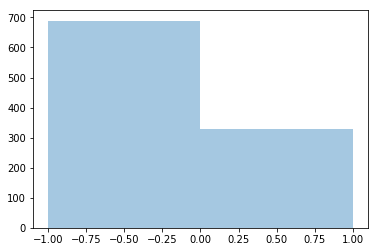

In [6]:
sns.distplot(y, bins=2, kde=False)

## <a id="Selection"> II) Feature selection </a>  

In [7]:
# Baseline
# For each variable, compute its correlation with the class y
correlations = []
for column in X.columns:
    correlations.append(X[column].corr(y))
    
# Absolute value to be able to sort
correlations = abs(np.array(correlations))

# Average correlation rate
m = correlations.mean()

In [8]:
X_select = X.copy()

for i, column in enumerate(X.columns):
    if correlations[i] < m: 
        X_select = X_select.drop(column, axis=1)

In [9]:
X_select.head()

,X0,X5,X6,X13,X21,X25,X26,X27,X28,X29,...,X126,X130,X138,X142,X147,X152,X154,X160,X165,X167
0,0.0,13.800,1.0,9.771,0.0,5.348,84.8,3.0,6.116,3.0,...,6.456,5.500,18.258,0.0,0.0,0.0,0.0,2068.0,0.0,0.0
1,0.0,9.416,0.0,9.975,0.0,5.712,119.0,0.0,6.806,0.0,...,6.045,5.516,17.859,4.0,2.0,2.0,0.0,1674.0,0.0,0.0
2,0.0,10.668,0.0,10.675,0.0,4.908,95.6,0.0,48.521,0.0,...,5.913,5.568,16.236,4.0,4.0,0.0,0.0,1230.0,0.0,0.0
3,0.0,18.000,0.0,9.183,0.0,4.508,114.5,0.0,4.925,0.0,...,5.994,5.564,16.242,0.0,1.0,0.0,0.0,988.0,0.0,0.0
4,0.0,9.864,0.0,11.577,0.0,4.480,155.3,2.0,16.583,2.0,...,6.096,5.424,19.077,11.0,15.0,9.0,0.0,4350.0,0.0,1.0


## <a id="Baseline"> III) Baseline classification model </a>  

#### Train/test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)
X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X_select, y, train_size=0.7, test_size=0.3)

#### Classification on feature selected dataset

In [11]:
clf = LogisticRegression()
clf.fit(X_train_select, np.array(y_train_select).ravel())
clf.score(X_test_select, np.array(y_test_select).ravel())

0.8529411764705882

#### Classification on original dataset

In [12]:
clf = LogisticRegression()
clf.fit(X_train, np.array(y_train).ravel())
clf.score(X_test, np.array(y_test).ravel())

0.8562091503267973

## <a id="Submission"> IV) Submission files </a>  

In [13]:
# selection
selection = []
for column in X.columns:
    if column in X_select.columns:
        selection.append(1)
    else:
        selection.append(0)
pd.Series(selection).to_csv('selection.csv', index=False)

# classification
test = pd.read_csv('../public_data_1/chems_test.data', header=None, names=features, sep=',')
prediction = clf.predict(test)
pd.Series(prediction).to_csv('classification.csv', index=False)